In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from data_aug import color_normalize
from my_models import ResNet
from train import train, test

In [2]:
# gpu config
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(device=physical_devices[0], enable=True)
if __name__ == '__main__':
    batch_size = 128
    train_num = 45000
    iterations_per_epoch = int(train_num / batch_size)
    boundaries = [30 * iterations_per_epoch, 50 * iterations_per_epoch]
    epoch_num = 60
    learning_rate = [0.1, 0.01, 0.001]
    stack_n = 3  # layers = stack_n * 6 + 2

    # load data
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)

    train_images = np.array(train_images, dtype=np.float32)
    test_images = np.array(test_images, dtype=np.float32)
    train_images, test_images = color_normalize(train_images, test_images)
    x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.1)
    print("x_train.shape=", x_train.shape)
    print("x_val.shape=", x_val.shape)
    print("y_train.shape=", y_train.shape)
    print("y_val.shape=", y_val.shape)
    print("test_images.shape=", test_images.shape)
    print("test_labels.shape=", test_labels.shape)
    # get model
    img_input = Input(shape=(32, 32, 3))
    output = ResNet(inputs = img_input, stack_n = stack_n)
    model = tf.keras.Model(img_input, output)

#     # show
    model.summary()

    

x_train.shape= (45000, 32, 32, 3)
x_val.shape= (5000, 32, 32, 3)
y_train.shape= (45000, 10)
y_val.shape= (5000, 10)
test_images.shape= (10000, 32, 32, 3)
test_labels.shape= (10000, 10)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activati

In [3]:
# train
learning_rate_schedules = tf.optimizers.schedules.PiecewiseConstantDecay(boundaries, learning_rate)
optimizer = tf.optimizers.SGD(learning_rate=learning_rate_schedules, momentum=0.9, nesterov=True)
# optimizer = tf.optimizers.Adam()
train_loss = []
train_acc = []
val_loss = []
val_acc = []
for epoch in range(epoch_num):
    print('epoch %d' % epoch)
    loss, acc = train(model, optimizer, x_train, y_train)
    train_loss.append(loss)
    train_acc.append(acc)
    
    loss, acc = test(model, x_val, y_val)
    val_loss.append(loss)
    val_acc.append(acc)

epoch 0


  0%|          | 0/25 [00:00<?, ?it/s]

ce_loss:1.418780, l2_loss:0.050012, accuracy:0.479745


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


test, loss:1.750100, accuracy:0.466400
epoch 1


100%|██████████| 25/25 [00:00<00:00, 187.78it/s]


ce_loss:0.947088, l2_loss:0.063408, accuracy:0.667490
test, loss:0.921460, accuracy:0.679000
epoch 2


100%|██████████| 25/25 [00:00<00:00, 187.62it/s]


ce_loss:0.771547, l2_loss:0.075816, accuracy:0.731504
test, loss:0.800336, accuracy:0.727000
epoch 3


100%|██████████| 25/25 [00:00<00:00, 186.83it/s]


ce_loss:0.669416, l2_loss:0.087434, accuracy:0.767139
test, loss:0.699513, accuracy:0.762400
epoch 4


100%|██████████| 25/25 [00:00<00:00, 189.04it/s]


ce_loss:0.604764, l2_loss:0.098286, accuracy:0.790643
test, loss:0.807087, accuracy:0.731400
epoch 5


100%|██████████| 25/25 [00:00<00:00, 179.27it/s]


ce_loss:0.556912, l2_loss:0.108718, accuracy:0.806557
test, loss:0.597708, accuracy:0.801600
epoch 6


100%|██████████| 25/25 [00:00<00:00, 191.93it/s]


ce_loss:0.516607, l2_loss:0.118947, accuracy:0.819556
test, loss:0.740786, accuracy:0.761400
epoch 7


100%|██████████| 25/25 [00:00<00:00, 187.27it/s]


ce_loss:0.482579, l2_loss:0.128900, accuracy:0.832710
test, loss:0.585864, accuracy:0.797600
epoch 8


100%|██████████| 25/25 [00:00<00:00, 174.15it/s]


ce_loss:0.458726, l2_loss:0.138711, accuracy:0.841146
test, loss:0.532796, accuracy:0.819800
epoch 9


100%|██████████| 25/25 [00:00<00:00, 187.61it/s]


ce_loss:0.437859, l2_loss:0.148234, accuracy:0.846844
test, loss:0.577516, accuracy:0.807400
epoch 10


100%|██████████| 25/25 [00:00<00:00, 200.49it/s]


ce_loss:0.418996, l2_loss:0.157570, accuracy:0.854857
test, loss:0.530577, accuracy:0.824600
epoch 11


100%|██████████| 25/25 [00:00<00:00, 196.06it/s]


ce_loss:0.400986, l2_loss:0.166781, accuracy:0.861111
test, loss:0.503195, accuracy:0.825200
epoch 12


100%|██████████| 25/25 [00:00<00:00, 202.17it/s]


ce_loss:0.380850, l2_loss:0.175757, accuracy:0.867143
test, loss:0.465594, accuracy:0.843400
epoch 13


100%|██████████| 25/25 [00:00<00:00, 204.50it/s]


ce_loss:0.370276, l2_loss:0.184599, accuracy:0.871839
test, loss:0.448085, accuracy:0.843200
epoch 14


100%|██████████| 25/25 [00:00<00:00, 201.65it/s]


ce_loss:0.351330, l2_loss:0.193542, accuracy:0.877738
test, loss:0.539038, accuracy:0.828200
epoch 15


100%|██████████| 25/25 [00:00<00:00, 186.85it/s]


ce_loss:0.339793, l2_loss:0.202257, accuracy:0.882991
test, loss:0.458201, accuracy:0.844000
epoch 16


100%|██████████| 25/25 [00:00<00:00, 194.64it/s]


ce_loss:0.329214, l2_loss:0.210967, accuracy:0.887264
test, loss:0.414699, accuracy:0.861200
epoch 17


100%|██████████| 25/25 [00:00<00:00, 198.96it/s]


ce_loss:0.320478, l2_loss:0.219381, accuracy:0.888399
test, loss:0.396672, accuracy:0.867200
epoch 18


100%|██████████| 25/25 [00:00<00:00, 186.37it/s]


ce_loss:0.307672, l2_loss:0.228060, accuracy:0.893674
test, loss:0.434068, accuracy:0.854200
epoch 19


100%|██████████| 25/25 [00:00<00:00, 185.83it/s]


ce_loss:0.299903, l2_loss:0.236667, accuracy:0.895099
test, loss:0.415141, accuracy:0.865400
epoch 20


100%|██████████| 25/25 [00:00<00:00, 202.96it/s]


ce_loss:0.290486, l2_loss:0.245099, accuracy:0.898193
test, loss:0.414818, accuracy:0.866000
epoch 21


100%|██████████| 25/25 [00:00<00:00, 188.86it/s]


ce_loss:0.277927, l2_loss:0.253398, accuracy:0.903023
test, loss:0.491179, accuracy:0.841800
epoch 22


100%|██████████| 25/25 [00:00<00:00, 195.66it/s]


ce_loss:0.271323, l2_loss:0.261711, accuracy:0.903134
test, loss:0.442144, accuracy:0.852200
epoch 23


100%|██████████| 25/25 [00:00<00:00, 189.19it/s]


ce_loss:0.262752, l2_loss:0.269880, accuracy:0.907363
test, loss:0.420418, accuracy:0.866000
epoch 24


100%|██████████| 25/25 [00:00<00:00, 181.00it/s]


ce_loss:0.258982, l2_loss:0.278219, accuracy:0.909433
test, loss:0.450392, accuracy:0.856200
epoch 25


100%|██████████| 25/25 [00:00<00:00, 183.49it/s]


ce_loss:0.251027, l2_loss:0.286315, accuracy:0.912683
test, loss:0.437476, accuracy:0.862000
epoch 26


100%|██████████| 25/25 [00:00<00:00, 198.88it/s]


ce_loss:0.246615, l2_loss:0.294501, accuracy:0.913395
test, loss:0.443921, accuracy:0.857200
epoch 27


100%|██████████| 25/25 [00:00<00:00, 198.35it/s]


ce_loss:0.235835, l2_loss:0.302574, accuracy:0.916132
test, loss:0.400237, accuracy:0.873600
epoch 28


100%|██████████| 25/25 [00:00<00:00, 200.04it/s]


ce_loss:0.238062, l2_loss:0.310639, accuracy:0.915264
test, loss:0.401996, accuracy:0.870800
epoch 29


100%|██████████| 25/25 [00:00<00:00, 183.05it/s]


ce_loss:0.223902, l2_loss:0.318523, accuracy:0.921230
test, loss:0.419643, accuracy:0.864400
epoch 30


100%|██████████| 25/25 [00:00<00:00, 190.25it/s]


ce_loss:0.180363, l2_loss:0.319010, accuracy:0.936476
test, loss:0.327058, accuracy:0.895400
epoch 31


100%|██████████| 25/25 [00:00<00:00, 189.01it/s]


ce_loss:0.153055, l2_loss:0.319193, accuracy:0.947449
test, loss:0.328144, accuracy:0.897200
epoch 32


100%|██████████| 25/25 [00:00<00:00, 175.35it/s]


ce_loss:0.146722, l2_loss:0.319358, accuracy:0.949853
test, loss:0.324617, accuracy:0.898800
epoch 33


100%|██████████| 25/25 [00:00<00:00, 157.56it/s]


ce_loss:0.139155, l2_loss:0.319519, accuracy:0.952101
test, loss:0.325569, accuracy:0.898200
epoch 34


100%|██████████| 25/25 [00:00<00:00, 187.89it/s]


ce_loss:0.133337, l2_loss:0.319682, accuracy:0.953214
test, loss:0.328160, accuracy:0.897600
epoch 35


100%|██████████| 25/25 [00:00<00:00, 185.46it/s]


ce_loss:0.131158, l2_loss:0.319840, accuracy:0.955017
test, loss:0.330702, accuracy:0.900200
epoch 36


100%|██████████| 25/25 [00:00<00:00, 181.95it/s]


ce_loss:0.126677, l2_loss:0.319994, accuracy:0.956130
test, loss:0.338350, accuracy:0.898600
epoch 37


100%|██████████| 25/25 [00:00<00:00, 199.06it/s]


ce_loss:0.127427, l2_loss:0.320139, accuracy:0.954839
test, loss:0.336898, accuracy:0.899200
epoch 38


100%|██████████| 25/25 [00:00<00:00, 186.82it/s]


ce_loss:0.120416, l2_loss:0.320292, accuracy:0.958600
test, loss:0.333492, accuracy:0.901000
epoch 39


100%|██████████| 25/25 [00:00<00:00, 188.52it/s]


ce_loss:0.119491, l2_loss:0.320438, accuracy:0.958600
test, loss:0.339234, accuracy:0.899800
epoch 40


100%|██████████| 25/25 [00:00<00:00, 180.98it/s]


ce_loss:0.117749, l2_loss:0.320583, accuracy:0.958600
test, loss:0.340211, accuracy:0.898400
epoch 41


100%|██████████| 25/25 [00:00<00:00, 196.99it/s]


ce_loss:0.117538, l2_loss:0.320721, accuracy:0.958333
test, loss:0.338817, accuracy:0.901600
epoch 42


100%|██████████| 25/25 [00:00<00:00, 172.27it/s]


ce_loss:0.112817, l2_loss:0.320869, accuracy:0.960470
test, loss:0.352169, accuracy:0.896200
epoch 43


100%|██████████| 25/25 [00:00<00:00, 200.88it/s]


ce_loss:0.111133, l2_loss:0.321010, accuracy:0.961850
test, loss:0.348895, accuracy:0.898000
epoch 44


100%|██████████| 25/25 [00:00<00:00, 193.11it/s]


ce_loss:0.111757, l2_loss:0.321148, accuracy:0.961249
test, loss:0.347527, accuracy:0.898800
epoch 45


100%|██████████| 25/25 [00:00<00:00, 186.02it/s]


ce_loss:0.108280, l2_loss:0.321293, accuracy:0.963341
test, loss:0.348654, accuracy:0.899600
epoch 46


100%|██████████| 25/25 [00:00<00:00, 185.15it/s]


ce_loss:0.106111, l2_loss:0.321441, accuracy:0.963297
test, loss:0.350470, accuracy:0.901200
epoch 47


100%|██████████| 25/25 [00:00<00:00, 183.77it/s]


ce_loss:0.107140, l2_loss:0.321579, accuracy:0.963186
test, loss:0.351317, accuracy:0.901600
epoch 48


100%|██████████| 25/25 [00:00<00:00, 197.58it/s]


ce_loss:0.106091, l2_loss:0.321719, accuracy:0.961984
test, loss:0.356498, accuracy:0.898800
epoch 49


100%|██████████| 25/25 [00:00<00:00, 188.64it/s]


ce_loss:0.105660, l2_loss:0.321865, accuracy:0.962184
test, loss:0.357550, accuracy:0.903200
epoch 50


100%|██████████| 25/25 [00:00<00:00, 187.68it/s]


ce_loss:0.098746, l2_loss:0.321878, accuracy:0.965033
test, loss:0.351295, accuracy:0.903400
epoch 51


100%|██████████| 25/25 [00:00<00:00, 187.85it/s]


ce_loss:0.098734, l2_loss:0.321886, accuracy:0.965856
test, loss:0.352760, accuracy:0.901600
epoch 52


100%|██████████| 25/25 [00:00<00:00, 180.70it/s]


ce_loss:0.095281, l2_loss:0.321894, accuracy:0.966814
test, loss:0.353025, accuracy:0.901600
epoch 53


100%|██████████| 25/25 [00:00<00:00, 193.31it/s]


ce_loss:0.094700, l2_loss:0.321903, accuracy:0.967971
test, loss:0.355025, accuracy:0.903800
epoch 54


100%|██████████| 25/25 [00:00<00:00, 192.83it/s]


ce_loss:0.095778, l2_loss:0.321911, accuracy:0.966435
test, loss:0.354367, accuracy:0.901200
epoch 55


100%|██████████| 25/25 [00:00<00:00, 187.25it/s]


ce_loss:0.092997, l2_loss:0.321920, accuracy:0.968216
test, loss:0.353818, accuracy:0.902600
epoch 56


100%|██████████| 25/25 [00:00<00:00, 197.76it/s]


ce_loss:0.092868, l2_loss:0.321929, accuracy:0.968060
test, loss:0.356022, accuracy:0.901200
epoch 57


100%|██████████| 25/25 [00:00<00:00, 190.49it/s]


ce_loss:0.091941, l2_loss:0.321938, accuracy:0.968483
test, loss:0.359352, accuracy:0.901800
epoch 58


100%|██████████| 25/25 [00:00<00:00, 191.69it/s]


ce_loss:0.094567, l2_loss:0.321946, accuracy:0.966925
test, loss:0.356618, accuracy:0.901200
epoch 59


100%|██████████| 25/25 [00:00<00:00, 205.78it/s]

ce_loss:0.091481, l2_loss:0.321955, accuracy:0.968372
test, loss:0.355632, accuracy:0.900400


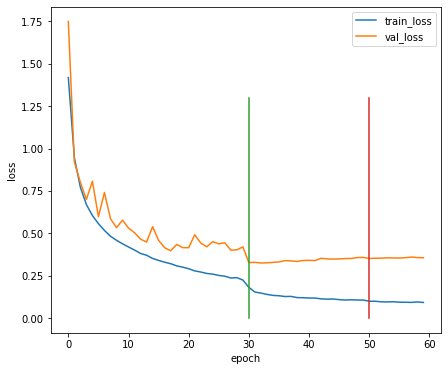

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(epoch_num)
const_x1 = [30]*20
const_x2 = [50]*20
const_y = np.linspace(0,1.3,20)
plt.figure(figsize=(7,6))
plt.plot(x, train_loss)
plt.plot(x, val_loss)
plt.plot(const_x1, const_y)
plt.plot(const_x2, const_y)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train_loss", "val_loss"])
plt.show()


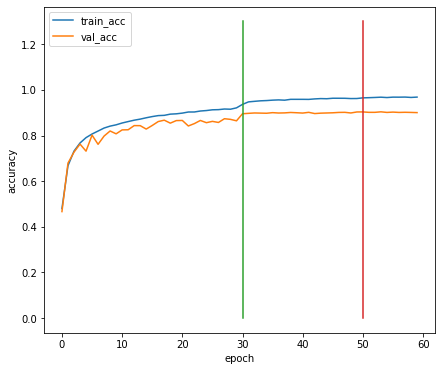

In [5]:
const_x1 = [30]*20
const_x2 = [50]*20
const_y = np.linspace(0,1.3,20)

plt.figure(figsize=(7,6))
plt.plot(x, train_acc)
plt.plot(x, val_acc)

plt.plot(const_x1, const_y)
plt.plot(const_x2, const_y)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train_acc", "val_acc"])
plt.show()

In [6]:
# test
test_batch_size = 200
test_num = 10000
test_loss = []
test_val = []
test_iterations = int(test_num / test_batch_size)
loss, acc = test(model, test_images, test_labels)

100%|██████████| 25/25 [00:00<00:00, 113.25it/s]

test, loss:0.405627, accuracy:0.895400
